# Exercise: Skill Pay Analysis

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import datetime as dt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Cleaning and specifying
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [30]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)


display(df_DA_top_pay)
display(df_DA_skills)




,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


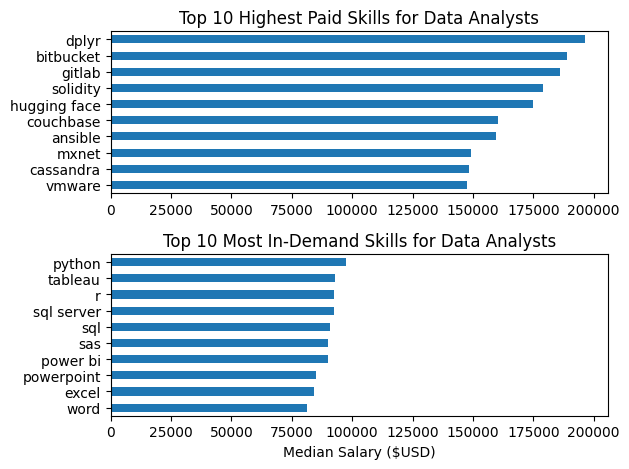

In [ ]:
fig, ax  = plt.subplots(2, 1)

df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')



# For the following can also reverse dataframe rows using [::-1]
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# Making xlims same
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()